# Exploratory Data Analysis
Demo from lecture 2 of [ORIE 4741](https://people.orie.cornell.edu/mru8/orie4741)

In [1]:
# Install packages
Pkg.add("DataFrames")
Pkg.add("Gadfly")

INFO: Initializing package repository /home/juser/.julia/v0.6
INFO: Cloning METADATA from https://github.com/JuliaLang/METADATA.jl
INFO: Updating cache of Compat...
INFO: Updating cache of DataArrays...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataStructures...
INFO: Cloning cache of FileIO from https://github.com/JuliaIO/FileIO.jl.git
INFO: Updating cache of GZip...
INFO: Updating cache of SortingAlgorithms...
INFO: Cloning cache of SpecialFunctions from https://github.com/JuliaMath/SpecialFunctions.jl.git
INFO: Updating cache of StatsBase...
INFO: Installing Compat v0.30.0
INFO: Installing DataArrays v0.6.2
INFO: Installing DataFrames v0.10.1
INFO: Installing DataStructures v0.6.1
INFO: Installing FileIO v0.5.1
INFO: Installing GZip v0.3.0
INFO: Installing Reexport v0.0.3
INFO: Installing SortingAlgorithms v0.1.1
INFO: Installing SpecialFunctions v0.3.1
INFO: Installing StatsBase v0.18.0
INFO: Package database updated
INFO: Updating cache of AxisAlgorithms...
INF

In [2]:
# bring packages into main namespace
using DataFrames, Gadfly

INFO: Precompiling module DataFrames.
INFO: Precompiling module Gadfly.
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:339
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:339
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:339
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:365
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:365
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:365
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:365
  likely near /home/juser/.julia/v0.6/Compose/src/property.jl:365
  likely near /home/juser/.julia/v0.6/Compose/src/svg.jl:141
  likely near /home/juser/.julia/v0.6/Compose/src/svg.jl:141
  likely near /home/juser/.julia/v0.6/Compose/src/svg.jl:141
  likely near /home/juser/.julia/v0.6/Compose/src/svg.jl:141


# Load data

The data is available on the course website, and is about 200MB.

If you point your browser to the url below, it will be downloaded to your standard download folder. On Mac, you can access it at `/Users/yourusername/Downloads/acs_2013.csv`.

In [3]:
url = "https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

"https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

Or, if you've synced or cloned the whole demos GitHub repo, you can access the truncated version `acs_2013_trunc.csv` locally without doing anything. (Try the readtable command below to test it out.)

In [4]:
acs = readtable("acs_2013_trunc.csv", nrows=10000);

# Summary statistics

In [5]:
size(acs)

(10000, 21)

In [6]:
income = acs[:HHINCOME];

In [7]:
median(income)

55000.0

In [8]:
std(income)

2.1760479511254504e6

In [9]:
maximum(income)

9.999999e6

In [10]:
# Plotting

In [11]:
"""compute summary statistics on observed values in data array"""
function summary_stats(arr::DataArray)
    clean_arr = dropna(arr)
    print("missing: $(mean(isna.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats

In [12]:
?summary_stats

search:



compute summary statistics on observed values in data array


In [13]:
summary_stats(income)

missing: 0.0%
maximum: 9.999999e6
minimum: 0.0
median:  55000.0
mean:    568847.3694
std:     2.1760479511254504e6


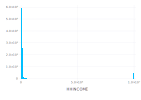

  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.j

In [14]:
plot(acs, x=:HHINCOME, Geom.histogram)

In [15]:
rows_with_99percent_income = acs[:HHINCOME].<4e6
acs99 = acs[rows_with_99percent_income,:];

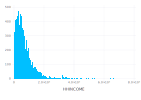

In [16]:
plot(acs99, x=:HHINCOME, Geom.histogram)

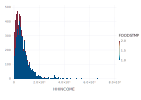

In [17]:
plot(acs99, x=:HHINCOME, color=:FOODSTMP, Geom.histogram(position=:stack))

# Now with recoded data
The truncated version of the cleaned data set is in the demos repo as `acs_2013_cleaned_trunc.csv`.

In [18]:
acs = readtable("acs_2013_cleaned_trunc.csv", nrows=10000);

In [19]:
summary_stats(acs[:HHINCOME])

missing: 0.0606%
maximum: 664040.0
minimum: 1.0
median:  52000.0
mean:    67966.16978922716
std:     64930.350456016524


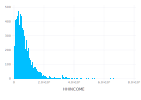

In [20]:
plot(acs, x=:HHINCOME, Geom.histogram)

In [21]:
import DataArrays.dropna
"""drop all rows of a data frame with a NA in column named s"""
function dropna(df::DataFrame, s::Symbol)
    return df[.!isna.(acs[:,s]),:]
end
function dropna(df::DataFrame, ss::Symbol...)
    keep_rows = fill(true, size(df,1))
    for s in ss
        keep_rows = keep_rows .& .!isna.(df[:,s])
    end
    return df[keep_rows,:]
end

dropna (generic function with 5 methods)

Look at income distribution by :FOODSTMP, :LABFORCE, :OWNERSHP, ...

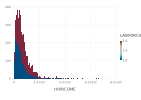

In [22]:
plot(dropna(acs, :LABFORCE), x=:HHINCOME, color=:LABFORCE, Geom.histogram)

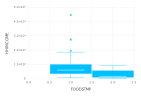

In [23]:
plot(dropna(acs, :FOODSTMP, :HHINCOME)[1:300,:], y=:HHINCOME, x=:FOODSTMP, Geom.boxplot)

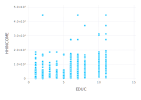

In [24]:
plot(dropna(acs, :EDUC, :HHINCOME)[1:800,:], y=:HHINCOME, x=:EDUC, Geom.point)

  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.6/IJulia/src/kernel.jl:31
in render at /Users/madeleine/.julia/v0.6/Gadfly/src/geom/point.jl


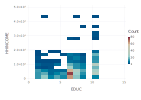

In [25]:
plot(dropna(acs, :EDUC, :HHINCOME)[1:800,:], y=:HHINCOME, x=:EDUC, Geom.histogram2d(ybincount=20))

# More good plotting tools: 

* [Plots.jl](https://juliaplots.github.io) in Julia
* [Gadfly documentation](http://dcjones.github.io/Gadfly.jl) in Julia
* [ggplot2](http://ggplot2.org/) in R
* [MatPlotLib](http://matplotlib.org/) in Python or Julia
* [D3](https://d3js.org/) in JavaScript